In [1]:
exec(open('init_notebook.py').read())

current working dirE:\AV\DataSetExploration\drone-dataset-tools\src


In [2]:
%load_ext autoreload
%autoreload 2

In [4]:
import logging
logging.basicConfig(level=logging.INFO)
from extractors.loader import Loader

In [5]:
dataDir = "G:AV datasets/inD-dataset-v1.0/data/"

In [6]:
loader = Loader(dataDir, 'inD')

## Some helper methods to get information of all recordings
Uncomment and run to see output

In [7]:
# rMeta = loader.getAllRecordingMeta() # All the meta files
# print(rMeta[0])

In [8]:
loader.locationToRecordingIds

{4: [0, 1, 2, 3, 4, 5, 6],
 1: [7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 2: [18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
 3: [30, 31, 32]}

In [9]:
# loader.getRecordingIdsOfALocation(1)

# Recording Specific methods

In [10]:
recordingData = loader.getRecordingData('18') # loads the recording with id 18

In [11]:
# recordingData.tracksMetaDf.head()
# recordingData.tracksDf.tail()

In [12]:
# recordingData.getPedIds() # All the pedestrian Ids in the recording

In [13]:

# pedFrames = loader.extractPedFrames(recordingData.tracksMetaDf, recordingData.tracksDf)
# pedFrames.tail()

In [14]:
# crossingIds = recordingData.getCrossingPedIds()
# recordingData.getCrossingPedIds() # only the ids who crosses the road.

In [15]:
# crossingDf = recordingData.getCrossingDf()
# crossingDf.head()

# LocationData - for aggregation

**get all the unique crossing ids**
```
loc2data = loader.getLocationData(2)
loc2data.getUniqueCrossingIds()
```
**get all the crossing data**
```
loc2data = loader.getLocationData(2)
crossingDf = loc2data.getCrossingDf()
```

In [16]:
loc2data = loader.getLocationData(2)

INFO:root:recordingIds: [18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [17]:
# loc2data.getUniqueCrossingIds()

In [18]:
crossingDf = loc2data.getCrossingDf() # get all crossing data

In [19]:
# crossingDf.head()
# crossingDf.tail()

In [20]:
# crossingDf[crossingDf['uniqueTrackId'] == 18001]

In [21]:
# loc2data.getSceneConfig() # scene configuration 

# Extracting scene data

In [22]:
from tools.TrajectoryUtils import TrajectoryUtils
from tools.TrajectoryVisualizer import TrajectoryVisualizer
import matplotlib.pyplot as plt
import numpy as np
visualizer = TrajectoryVisualizer(loader)

In [23]:
pedDf = crossingDf[crossingDf['uniqueTrackId'] == 18001]

In [24]:
splines = TrajectoryUtils.dfToSplines(pedDf, 'xCenter', 'yCenter', 1)
(x, y) = splines.xy
print(np.array(x))

[32.13296 32.02216 31.74821 31.37277 31.02194 30.68069 30.23967 29.51279
 28.70589 28.02859 27.40982 26.7739  26.14379 25.33379 24.38074 23.40634
 22.39725 21.38773 20.37847 19.41474 18.47334 17.70889 16.9982  16.39771
 15.97277 15.64393 15.44685 15.28162 15.09274 14.97506 14.90452 14.73923
 14.25039 13.48242 12.57163 12.35633]


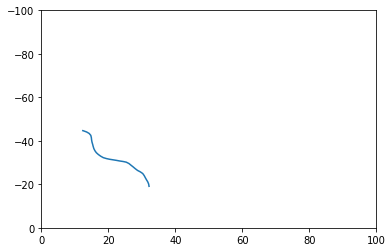

In [25]:
plt.plot(*splines.xy)
plt.xlim([0, 100])
plt.ylim([-100, 0])
plt.gca().invert_yaxis()

In [26]:
# sceneDf = loc2data.getSceneCrossingDf(1, 10, 10)

In [27]:
# sceneDf.head()

In [28]:
# len(sceneDf.uniqueTrackId.unique())

In [29]:
# len(crossingDf.uniqueTrackId.unique()) 

INFO:root:crossing ids for 18: SortedList([1, 4, 20, 23, 26, 42, 53, 61, 63, 69, 70, 71, 72, 74, 77, 78, 82, 87, 90, 99, 100, 107, 112, 116, 121, 127, 128, 134, 147, 148, 156, 162, 163, 166, 168, 173, 180, 181, 183, 185, 193, 196, 201, 204, 211, 214, 216, 225, 230, 237, 242, 248, 256, 262, 267, 273, 277, 279, 280, 281, 285, 298, 299, 302, 304, 306, 311, 319, 322, 325, 327, 334, 337, 339, 344, 347, 353, 356, 365, 375, 382, 387, 388, 389, 390, 396, 399, 404, 408, 409, 412, 420, 422])
INFO:root:uniqueIds for 18: [18001 18004 18020 18023 18026 18042 18053 18061 18063 18069 18070 18071
 18072 18074 18077 18078 18082 18087 18090 18099 18100 18107 18112 18116
 18121 18127 18128 18134 18147 18148 18156 18162 18163 18166 18168 18173
 18180 18181 18183 18185 18193 18196 18201 18204 18211 18214 18216 18225
 18230 18237 18242 18248 18256 18262 18267 18273 18277 18279 18280 18281
 18285 18298 18299 18302 18304 18306 18311 18319 18322 18325 18327 18334
 18337 18339 18344 18347 18353 18356 18365 1837

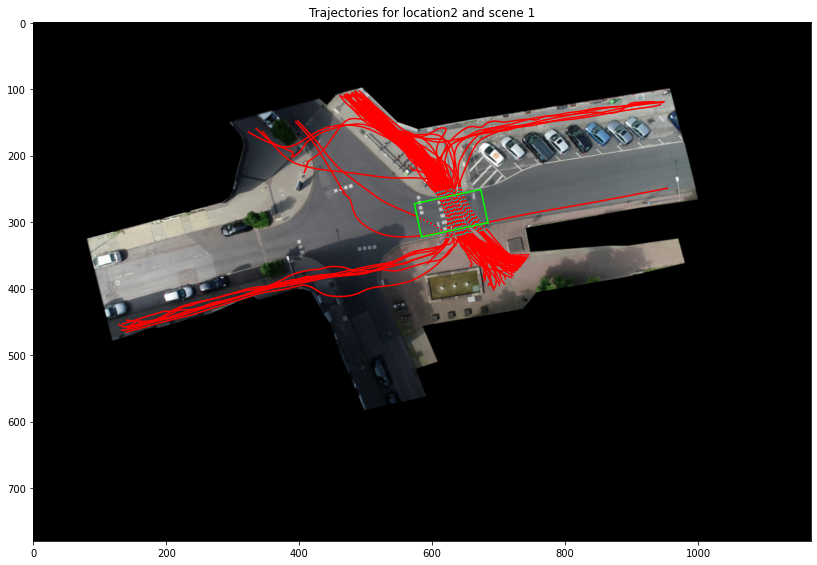

In [30]:
sceneData = loc2data.getSceneCrossingData(1, 10, 5, refresh=True)
visualizer.showLocationSceneData(sceneData)

2022-09-20 23:07:11.205 | INFO     | tools.TrajectoryVisualizer:initPlot:29 - Loading background image from G:AV datasets/inD-dataset-v1.0/data/18_background.png


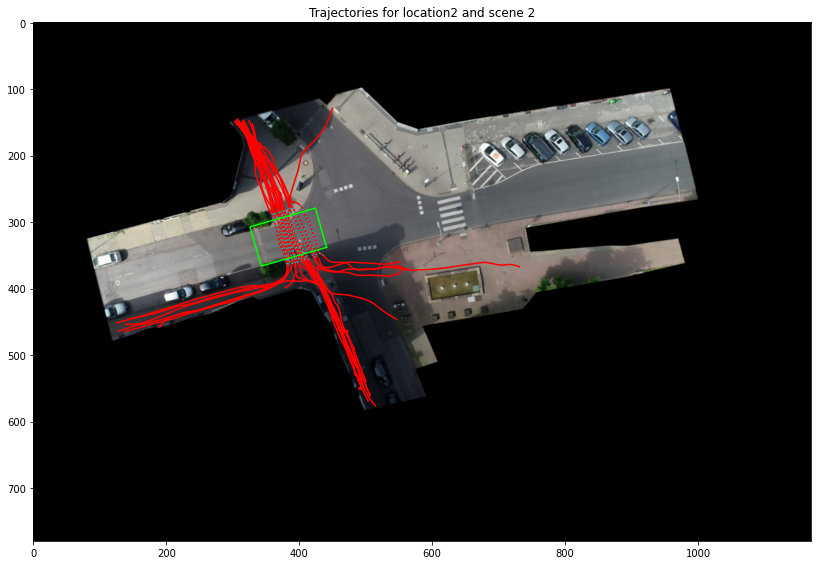

In [31]:
scene2Data = loc2data.getSceneCrossingData(2, 10, 6, refresh=True)
visualizer.showLocationSceneData(scene2Data)

2022-09-20 23:07:31.166 | INFO     | tools.TrajectoryVisualizer:initPlot:29 - Loading background image from G:AV datasets/inD-dataset-v1.0/data/18_background.png


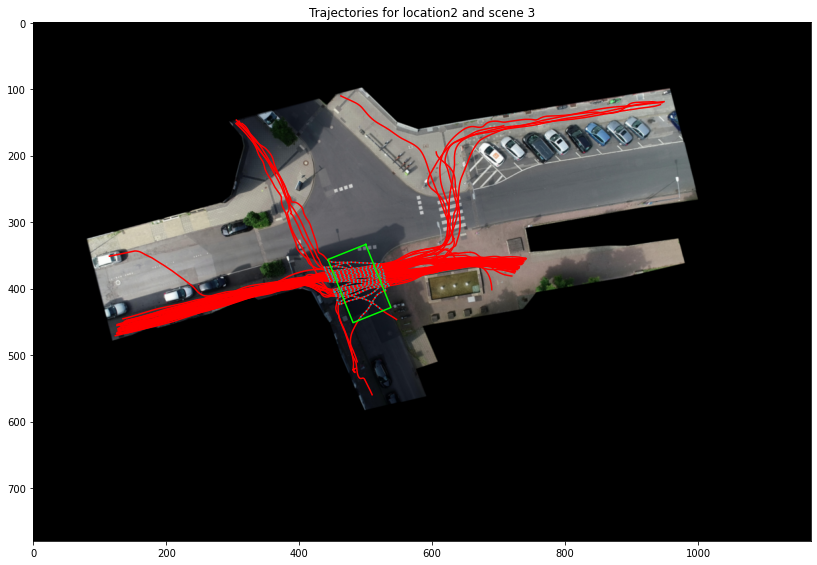

In [32]:
scene3Data = loc2data.getSceneCrossingData(3, 10, 6, refresh=True)
visualizer.showLocationSceneData(scene3Data)

2022-09-20 23:07:56.463 | INFO     | tools.TrajectoryVisualizer:initPlot:29 - Loading background image from G:AV datasets/inD-dataset-v1.0/data/18_background.png


Disregarding trajectory for 19040 because the length is too low
Disregarding trajectory for 19063 because the length is too low
Disregarding trajectory for 19288 because the length is too low


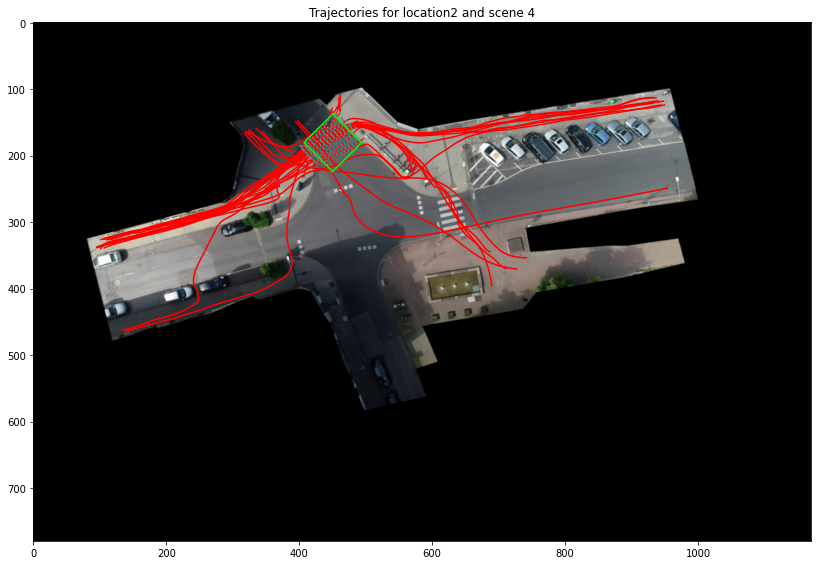

In [33]:
scene4Data = loc2data.getSceneCrossingData(4, 6, 6, refresh=True)
visualizer.showLocationSceneData(scene4Data)

2022-09-20 23:08:16.591 | INFO     | tools.TrajectoryVisualizer:initPlot:29 - Loading background image from G:AV datasets/inD-dataset-v1.0/data/18_background.png


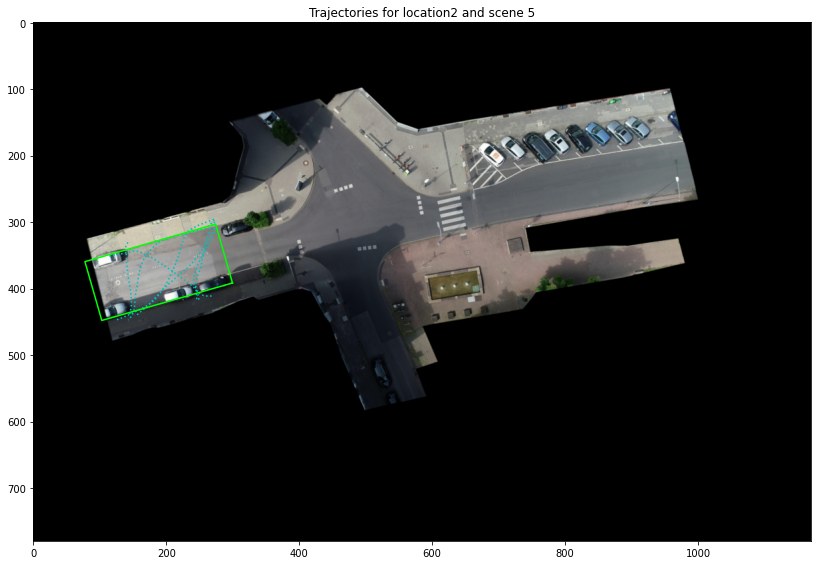

In [34]:
scene5Data = loc2data.getSceneCrossingData(5, 20, 9, refresh=False)
visualizer.showLocationSceneData(scene5Data, onlyClipped=True)

2022-09-20 23:08:35.447 | INFO     | tools.TrajectoryVisualizer:initPlot:29 - Loading background image from G:AV datasets/inD-dataset-v1.0/data/18_background.png


Disregarding trajectory for 18334 because the length is too low


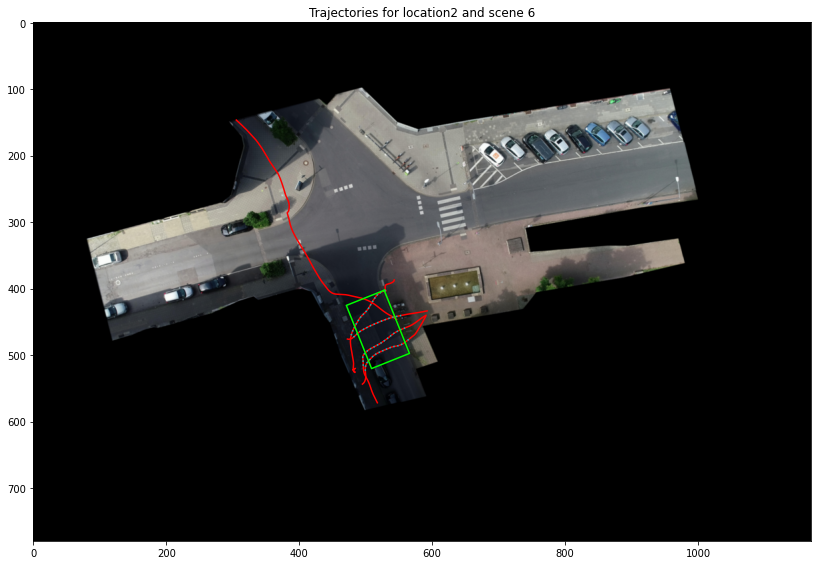

In [35]:
scene6Data = loc2data.getSceneCrossingData(6, 10, 6, refresh=True)
visualizer.showLocationSceneData(scene6Data)

In [78]:
scene5Data.transformToLocalCoordinate()
sceneDf = scene5Data.getClippedDfs()
sceneDf.head()

,recordingId,trackId,frame,trackLifetime,xCenter,yCenter,heading,width,length,xVelocity,yVelocity,xAcceleration,yAcceleration,uniqueTrackId,sceneId,sceneX,sceneY
0,18,1,211,211,26.60301,-28.98654,225.26829,0.0,0.0,-0.86347,-1.13728,-0.06830,0.10518,18001,5,9.985276,5.171479
1,18,1,212,212,26.56985,-29.03385,224.93987,0.0,0.0,-0.86519,-1.13267,-0.08221,0.13033,18001,5,9.940360,5.135142
2,18,1,213,213,26.53628,-29.08057,224.59823,0.0,0.0,-0.86791,-1.12644,-0.09675,0.15492,18001,5,9.895212,5.099485
3,18,1,214,214,26.50233,-29.12662,224.24346,0.0,0.0,-0.87156,-1.11879,-0.11160,0.17853,18001,5,9.849884,5.064577
4,18,1,215,215,26.46800,-29.17184,223.87570,0.0,0.0,-0.87604,-1.10995,-0.12654,0.20087,18001,5,9.804420,5.030571


2022-09-20 23:38:29.820 | INFO     | tools.TrajectoryVisualizer:initPlot:29 - Loading background image from G:AV datasets/inD-dataset-v1.0/data/18_background.png


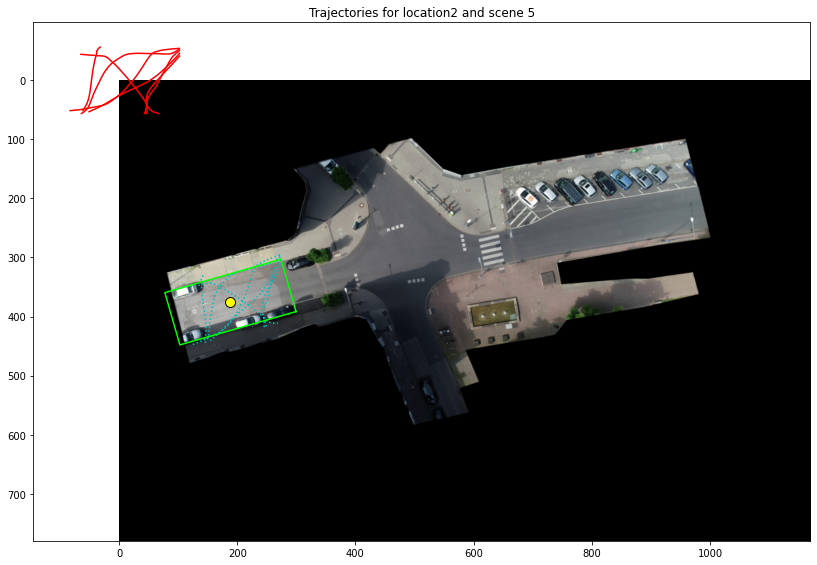

In [79]:
scene5Data = loc2data.getSceneCrossingData(5, 20, 9, refresh=False)
visualizer.showLocationSceneData(scene5Data, onlyClipped=True, showLocal=True)